In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingRegressor

In [4]:
# Load the dataset
data = pd.read_csv('flightData.csv')

In [5]:
# Display basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [6]:
# Basic statistics
print(data.describe())

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


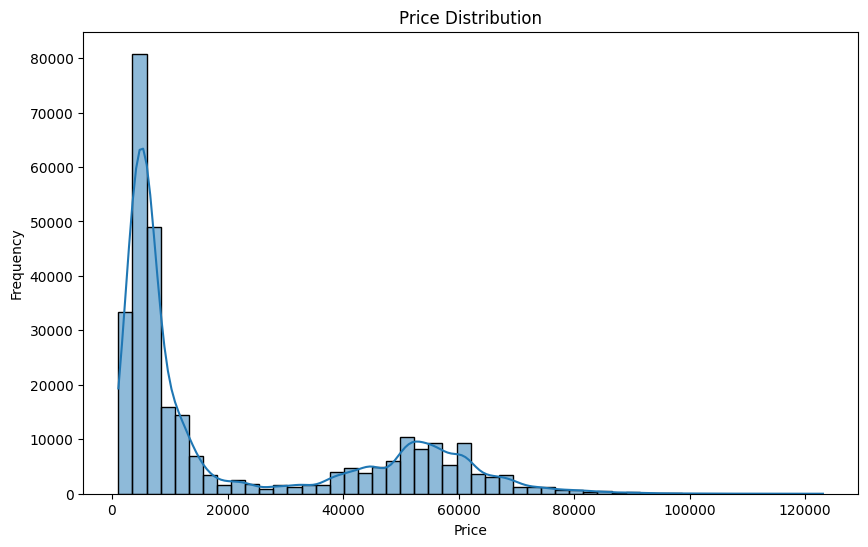

In [7]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Features and target variable
X = data.drop(columns=['Unnamed: 0', 'flight', 'price'])
y = data['price']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Preprocessing for numerical data: impute missing values and scale
numerical_features = ['duration', 'days_left']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [13]:
# Preprocessing for categorical data: impute missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
# Define the models
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model3 = AdaBoostRegressor(n_estimators=100, random_state=42)

In [16]:
# Bundle preprocessing and modeling code in a pipeline
pipeline1 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model2)])
pipeline3 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model3)])

In [17]:
# Train the models
pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model',
                 AdaBoostRegressor(n_estimators=100, random_state=42))])

In [18]:
# Predict the test set results
y_pred1 = pipeline1.predict(X_test)
y_pred2 = pipeline2.predict(X_test)
y_pred3 = pipeline3.predict(X_test)

In [19]:
# Calculate the mean squared error
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)

In [20]:
print(f'Mean Squared Error of Random Forest: {mse1}')
print(f'Mean Squared Error of Gradient Boosting: {mse2}')
print(f'Mean Squared Error of AdaBoost: {mse3}')

Mean Squared Error of Random Forest: 19307628.30471781
Mean Squared Error of Gradient Boosting: 30959113.381863296
Mean Squared Error of AdaBoost: 43880282.88054733


In [22]:
# Ensemble Model: Voting Regressor
ensemble_model = VotingRegressor(estimators=[
    ('rf', pipeline1),
    ('gb', pipeline2),
    ('ab', pipeline3)
])

In [23]:
# Train the ensemble model
ensemble_model.fit(X_train, y_train)


VotingRegressor(estimators=[('rf',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['duration',
                                                                                'days_left']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknow...
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['duration',
                                                                                'days_left']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['departure_time',
                                                                                'stops',
                                                                                'arrival_time',
                                                                                'destination_city',
                                                                                'class'])])),
                                             ('model',
                                              AdaBoostRegressor(n_estimators=100,
                                                                random_state=42))]))])

In [24]:
# Predict with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

In [25]:
# Calculate the mean squared error of the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)

In [26]:
print(f'Mean Squared Error of Ensemble Model: {mse_ensemble}')

Mean Squared Error of Ensemble Model: 24073227.29835497


In [29]:
# Calculate the mean absolute error
mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)
mae3 = mean_absolute_error(y_test, y_pred3)

In [30]:
print(f'Mean Absolute Error of Random Forest: {mae1}')
print(f'Mean Absolute Error of Gradient Boosting: {mae2}')
print(f'Mean Absolute Error of AdaBoost: {mae3}')

Mean Absolute Error of Random Forest: 2077.5172841869276
Mean Absolute Error of Gradient Boosting: 3290.6847108097245
Mean Absolute Error of AdaBoost: 4064.371298335806


In [31]:
# Calculate the mean absolute error of the ensemble model
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

In [32]:
print(f'Mean Absolute Error of Ensemble Model: {mae_ensemble}')

Mean Absolute Error of Ensemble Model: 2905.9768676418043
